<a href="https://colab.research.google.com/github/Negi97Mohit/Resnet18-CNN-NN-on-fetch_lfw_people/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment-6

<div class="alert alert-block alert-info">
<b>1 : </b>Apply PCA/Neural Networks, CNN, and ResNet on the the face dataset (from sklearn.datasets import fetch_lfw_people) and compare the performances.As before, prepare a few slides to present your results.
</div>

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Preprocesing
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Dataset
from sklearn.datasets import fetch_lfw_people

# Models
from sklearn.decomposition import PCA
import sklearn.manifold as manifold
import sklearn.linear_model as lm
import sklearn.svm as svm
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Input, BatchNormalization
from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras import models, optimizers,layers
from keras.utils import np_utils
import tensorflow as tf
from sklearn.decomposition import PCA
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D

# Pytorch Models
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import skorch

# Use [skorch](https://github.com/skorch-dev/skorch). Install:
# `conda install -c conda-forge skorch`


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### 1. Neural network

In [ ]:
face_data = fetch_lfw_people(min_faces_per_person=120)
X = face_data.data
Y = face_data.target
print("input data size:", X.shape)
print("output data size:", Y.shape)
print("label name:", face_data.target_names)

input data size: (1031, 2914)
output data size: (1031,)
label name: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Tony Blair']


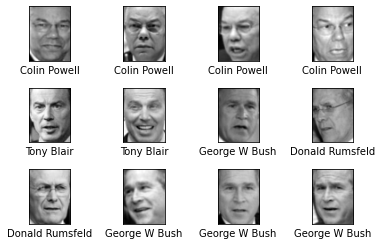

In [ ]:
#Ploting the images
fig, ax = plt.subplots(3, 4)
plt.subplots_adjust(wspace=0.8, hspace=0.5)

for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=face_data.target_names[face_data.target[i]])

plt.show()

In [ ]:
for i in range(len(face_data.target_names)):   
    print("{} has {} samples".format(face_data.target_names[i], (Y == i).sum()))

Colin Powell has 236 samples
Donald Rumsfeld has 121 samples
George W Bush has 530 samples
Tony Blair has 144 samples


In [ ]:
df=pd.DataFrame(X)
df['target']=Y

strategy = {0:120, 1:120, 2:120, 3:120}
rs=RandomUnderSampler(random_state=42, sampling_strategy = strategy)
df_sampled,_=rs.fit_resample(df,df.target)

print(df_sampled.target.value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0    120
1    120
2    120
3    120
Name: target, dtype: int64


In [ ]:
#Spliting dataset into test & train dataset
Y = df_sampled.target.values
X = df_sampled.iloc[:,0:2914].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y, random_state=0)

print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

df = pd.DataFrame(y_train)
df.value_counts()

(480, 2914)
(336, 2914)
(336,)
(144, 2914)
(144,)


0    84
1    84
2    84
3    84
dtype: int64

In [188]:
#Using pandas get_dummies for OneHotEncoding the dataset
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)

#Building the neural network
model = Sequential()

model.add(Dense(2048, input_dim=2914))
model.add(Activation("relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(2048, input_dim=2914))
model.add(Activation("relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(rate=0.2))

model.add(Dense(4))
model.add(Activation("softmax"))
model.summary()

#Compiling the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 2048)              5969920   
                                                                 
 activation_17 (Activation)  (None, 2048)              0         
                                                                 
 dropout_32 (Dropout)        (None, 2048)              0         
                                                                 
 dense_35 (Dense)            (None, 64)                131136    
                                                                 
 activation_18 (Activation)  (None, 64)                0         
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 2048)            

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862959146499634
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 50
Epochs: 20


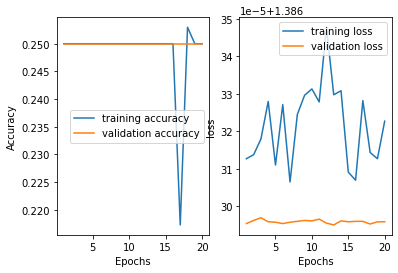

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863009214401245
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 100
Epochs: 20


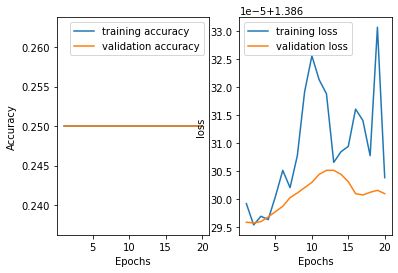

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863080739974976
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 150
Epochs: 20


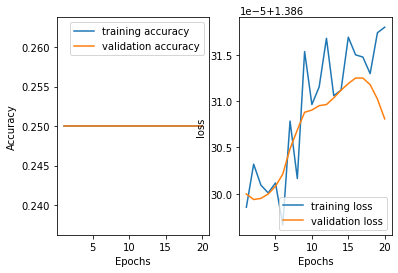

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863023519515991
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 200
Epochs: 20


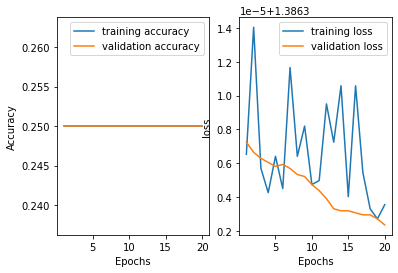

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862955570220947
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 50
Epochs: 50


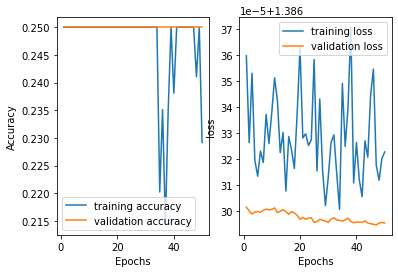

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862993717193604
evaluate acc: 0.25
predicted [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 100
Epochs: 50


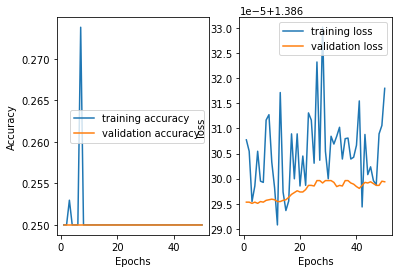

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.386320948600769
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 150
Epochs: 50


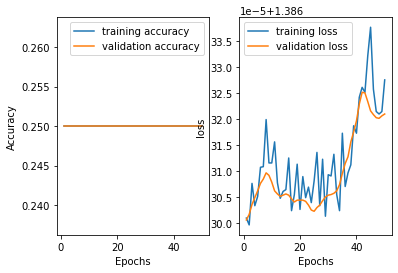

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863027095794678
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 200
Epochs: 50


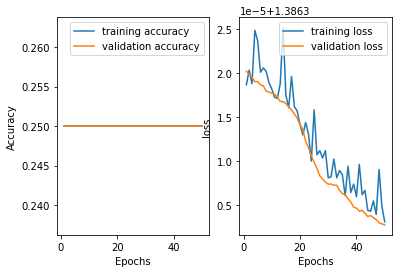

5/5 [==============================] - 0s 6ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.386294960975647
evaluate acc: 0.25
predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 50
Epochs: 100


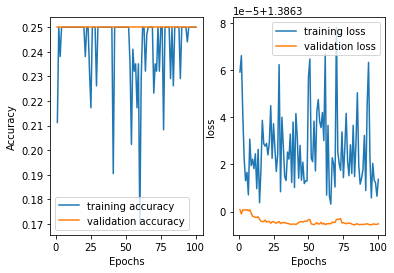

5/5 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863011598587036
evaluate acc: 0.25
predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 100
Epochs: 100


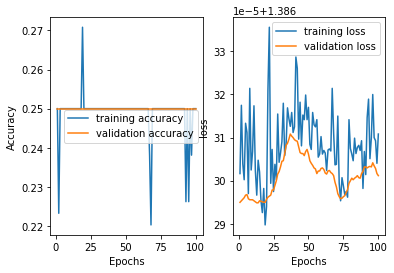

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.386345624923706
evaluate acc: 0.25
predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 150
Epochs: 100


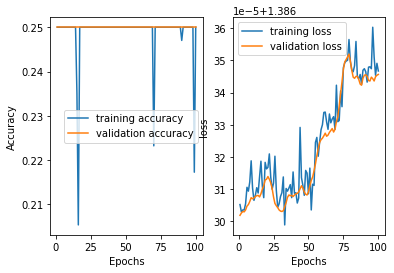

5/5 [==============================] - 0s 6ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862996101379395
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 200
Epochs: 100


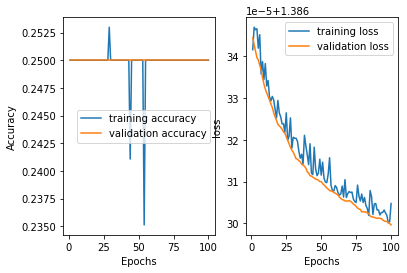

5/5 [==============================] - 0s 6ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862953186035156
evaluate acc: 0.25
predicted [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 50
Epochs: 150


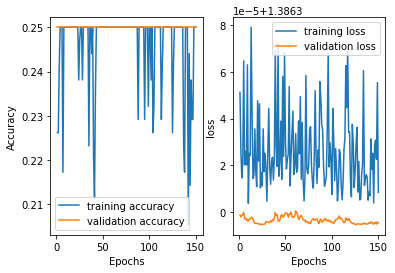

5/5 [==============================] - 0s 8ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862967491149902
evaluate acc: 0.25
predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 100
Epochs: 150


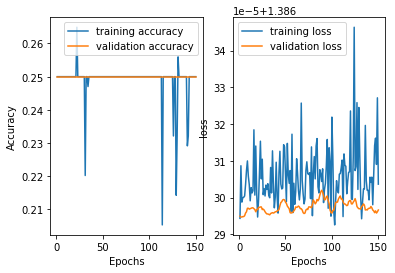

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863117694854736
evaluate acc: 0.25
predicted [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 150
Epochs: 150


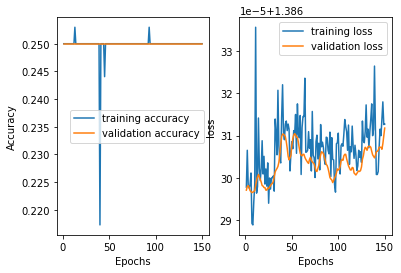

5/5 [==============================] - 0s 6ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862944841384888
evaluate acc: 0.25
predicted [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 200
Epochs: 150


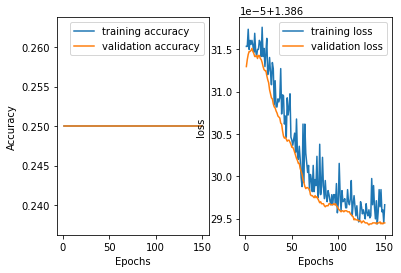

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.386295199394226
evaluate acc: 0.25
predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 50
Epochs: 200


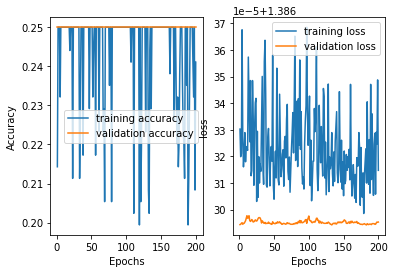

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3863167762756348
evaluate acc: 0.25
predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 100
Epochs: 200


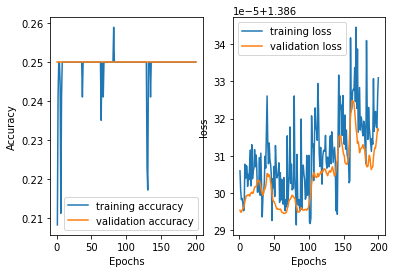

5/5 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.386328101158142
evaluate acc: 0.25
predicted [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 150
Epochs: 200


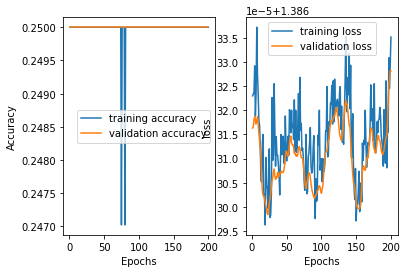

5/5 [==============================] - 0s 8ms/step - loss: 1.3863 - accuracy: 0.2500
evaluate loss: 1.3862972259521484
evaluate acc: 0.25
predicted [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
actual [2 1 3 1 1 0 1 3 0 3 2 3 3 2 2 0 0 3 1 1]
Bacth size: 200
Epochs: 200


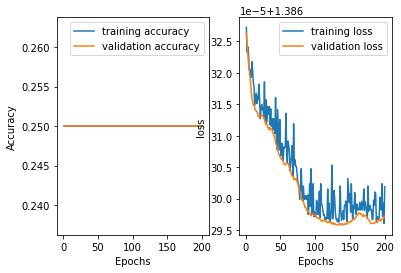

In [ ]:
# Running the model & plotting the accuracy and loss
epochs=[20,50,100,150,200]
batchsizes=[50,100,150,200]
for epoch in epochs:
  for batchsize in batchsizes:
    history = model.fit(X_train, y_train_onehot, epochs= epoch, batch_size= batchsize, verbose=0, validation_data=(X_test, y_test_onehot) )

    score = model.evaluate(X_test, y_test_onehot, verbose=1)
    print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

    pred = np.argmax(model.predict(X_test), axis=1)
    print("predicted", pred[0:20])
    print("actual", y_test[0:20])
    print("Bacth size:",batchsize)
    print("Epochs:",epoch)
    
    #Plotting the accuracy
    gr1 = plt.subplot(1, 2, 1)
    gr1.plot(range(1, epoch+1), history.history['accuracy'], label="training accuracy")
    gr1.plot(range(1, epoch+1), history.history['val_accuracy'], label="validation accuracy")
    gr1.set_xlabel('Epochs')
    gr1.set_ylabel('Accuracy')
    gr1.legend()

    #Plotting the loss
    gr2 = plt.subplot(1, 2, 2)
    gr2.plot(range(1, epoch+1), history.history['loss'], label="training loss")
    gr2.plot(range(1, epoch+1), history.history['val_loss'], label="validation loss")
    gr2.set_xlabel('Epochs')
    gr2.set_ylabel('loss')
    gr2.legend()
    plt.show()

#### 2.Convolution Neural network



In [ ]:
#Loading the dataset
lfw = fetch_lfw_people(data_home='./scikit_learn_data/', min_faces_per_person=100, resize=0.5)

In [ ]:
#Spliting the dataset into test and train
X = lfw.data
y = lfw.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
v,h = lfw.images.shape[1:3] 
n_train = X_train.shape[0]  
n_test  = X_test.shape[0]   

#Using standardScaler to bring the dataset onto a single scale
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)

ms = MinMaxScaler(feature_range=(0,1))
ms.fit(X_train_sc)
X_train_sc = ms.transform(X_train_sc)
X_test_sc  = ms.transform(X_test_sc)

X_train_sc = X_train_sc.reshape([n_train, v, h, 1])
X_test_sc  = X_test_sc.reshape([n_test, v, h, 1])

y_train_cat = np_utils.to_categorical(y_train,5)
y_test_cat  = np_utils.to_categorical(y_test,5)

In [ ]:
#Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(v, h, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
#Model paramters
lr     = 0.001
beta_1 = 0.9
beta_2 = 0.999
decay  = 0.0
tf.optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=None, decay=decay, amsgrad=False)

#Compiling the model
model.compile(optimizer = 'Adam',
              loss      = 'categorical_crossentropy',
              metrics   = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


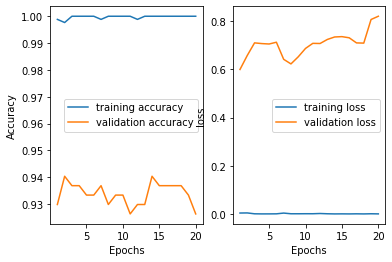

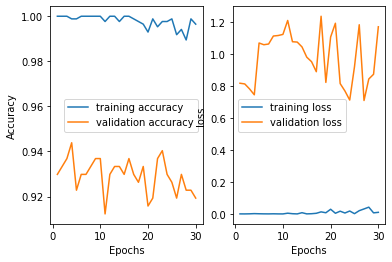

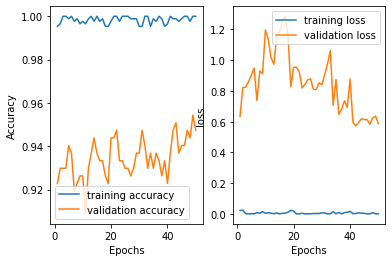

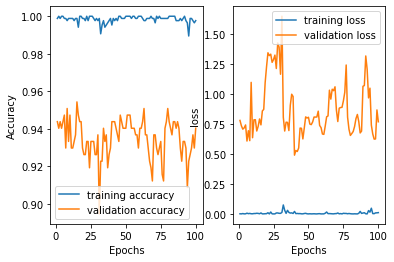

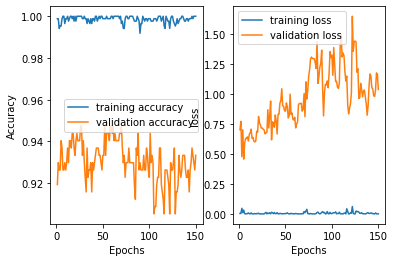

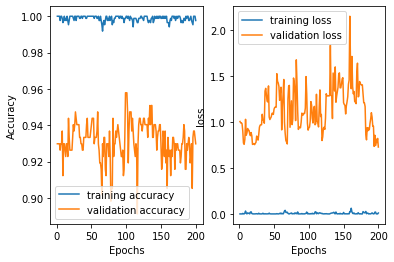

In [ ]:
#Running the model for different epochs
n_epoc   = [20,30,50,100,150,200]

for epoch in n_epoc:
  hist = model.fit(X_train_sc,
                    y_train_cat,
                    epochs=epoch,
                    validation_data=(X_test_sc, y_test_cat),
                    verbose=0,)
  
  #Plotting the Accuracy
  gr1 = plt.subplot(1, 2, 1)
  gr1.plot(range(1, epoch+1), hist.history['acc'], label="training accuracy")
  gr1.plot(range(1, epoch+1), hist.history['val_acc'], label="validation accuracy")
  gr1.set_xlabel('Epochs')
  gr1.set_ylabel('Accuracy')
  gr1.legend()

  #Plotting the loss
  gr2 = plt.subplot(1, 2, 2)
  gr2.plot(range(1, epoch+1), hist.history['loss'], label="training loss")
  gr2.plot(range(1, epoch+1), hist.history['val_loss'], label="validation loss")
  gr2.set_xlabel('Epochs')
  gr2.set_ylabel('loss')
  gr2.legend()
  plt.show()

In [ ]:
#Saving the model
model.save('./model_cnn_adam.h5')
model = models.load_model('./model_cnn_adam.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 60, 45, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 58, 43, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 21, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 29, 21, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 27, 19, 64)        18496     
                                                                 
 conv2d_25 (Conv2D)          (None, 25, 17, 64)        36928     
                                                     

#### 3.ResNet 18

In [190]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Plot a gallery of portraits."""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(images.shape[0], n_row * n_col)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    """Plot the result of the prediction on a portion of the test set."""
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


def label_proportion(x, decimals=2):
    """Labels's proportions."""
    unique, counts = np.unique(x, return_counts=True)
    return dict(zip(unique, np.round(counts / len(x), decimals)))

In [191]:
#importting the dataset
people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)

#reading the image arrays to find shape
samples,h,w=people.images.shape

#for ML we use 2 data directly
#position info is ignored
X=people.data
n_features=X.shape[1]  
X=StandardScaler().fit_transform(X)

#lable to predict is the id of the person
y=people.target
target_names=people.target_names
n_classes=target_names.shape[0]  

print("Total dataset size:")
print("n_samples: %d" % samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
print({target_names[lab]: prop for lab, prop
       in label_proportion(y_train).items()})  

{'Ariel Sharon': 0.06, 'Colin Powell': 0.18, 'Donald Rumsfeld': 0.09, 'George W Bush': 0.41, 'Gerhard Schroeder': 0.08, 'Hugo Chavez': 0.06, 'Tony Blair': 0.11}


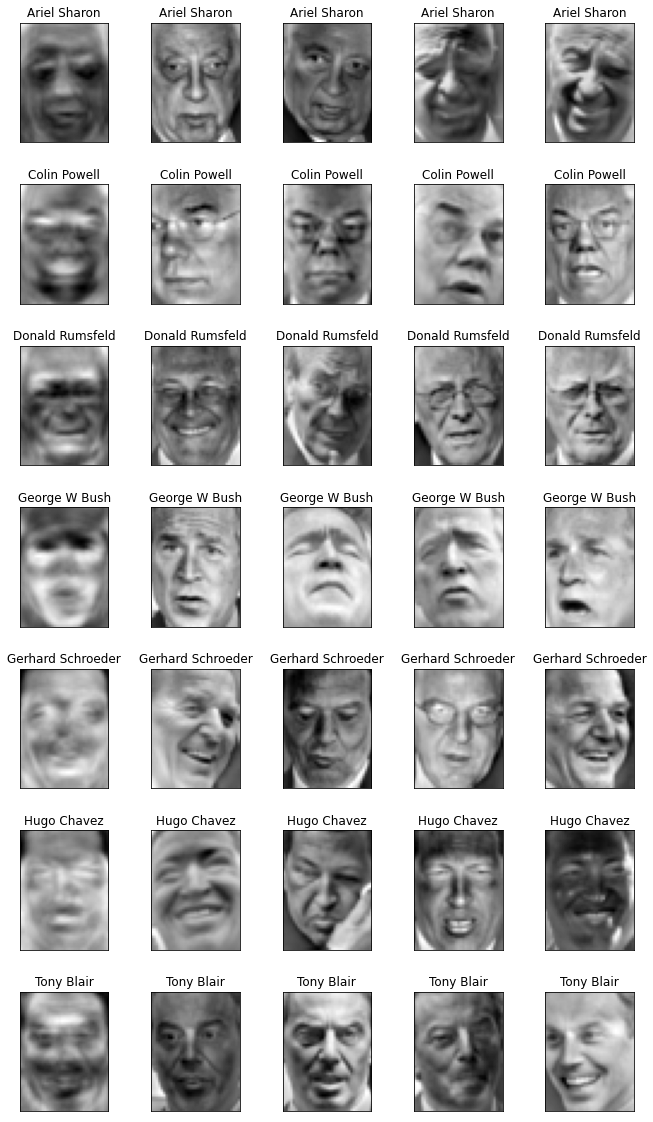

In [193]:
single_faces = [X_train[y_train == lab][:5] for lab in np.unique(y_train)]
single_faces = np.vstack(single_faces).reshape((5 * n_classes, h, w))

mean_faces = [X_train[y_train == lab].mean(axis=0) for lab in
              np.unique(y_train)]
mean_faces = np.vstack(mean_faces).reshape((n_classes, h, w))

single_faces[::5, :, :] = mean_faces
titles = [n for name in target_names for n in [name] * 5]
plot_gallery(single_faces, titles, h, w, n_row=n_classes, n_col=5)

In [194]:
n_components = 200

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

# print("Explained variance", pca.explained_variance_ratio_)
print("\n Sum Explained variance", sum(pca.explained_variance_ratio_)*100,"%")

Extracting the top 200 eigenfaces from 1030 faces
done in 0.471s

 Sum Explained variance 97.03715027571889 %


In [195]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


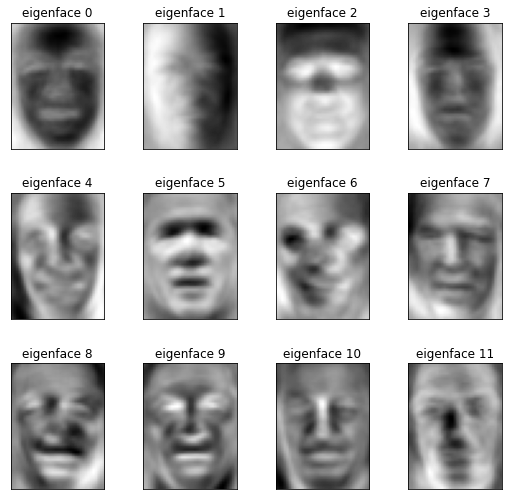

In [196]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: CVSplit is deprecated, use the new name ValidSplit instead
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

done in 62.278s
                   precision    recall  f1-score   support

     Ariel Sharon       0.94      1.00      0.97        16
     Colin Powell       0.96      0.91      0.93        47
  Donald Rumsfeld       0.86      0.79      0.83        24
    George W Bush       0.93      0.93      0.93       106
Gerhard Schroeder       0.66      0.86      0.75        22
      Hugo Chavez       0.88      0.50      0.64        14
       Tony Blair       0.90      0.93      0.92        29

         accuracy                           0.89       258
        macro avg       0.87      0.85      0.85       258
     weighted avg       0.90      0.89      0.89       258



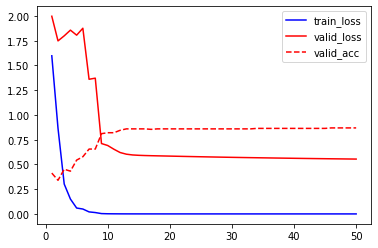

In [205]:
class Resnet18(nn.Module):
    """ResNet 18, pretrained, with one input chanel and 7 outputs."""

    def __init__(self, in_channels=1, n_outputs=7):
        super(Resnet18, self).__init__()

        # self.model = torchvision.models.resnet18()
        self.model = torchvision.models.resnet18(pretrained=True)

        # original definition of the first layer on the renset class
        # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
        #                        bias=False)
        # one channel input (greyscale):
        self.model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2,
                                     padding=3, bias=False)

        # Last layer
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, n_outputs)

    def forward(self, x):
        return self.model(x)


torch.manual_seed(0)
resnet = NeuralNetClassifier(
    Resnet18,
    # `CrossEntropyLoss` combines `LogSoftmax and `NLLLoss`
    criterion=nn.CrossEntropyLoss,
    max_epochs=50,
    batch_size=128,  # default value
    optimizer=torch.optim.Adam,
    # optimizer=torch.optim.SGD,
    optimizer__lr=0.001,
    optimizer__betas=(0.9, 0.999),
    optimizer__eps=1e-4,
    optimizer__weight_decay=0.0001,  # L2 regularization
    # Shuffle training data on each epoch
    # iterator_train__shuffle=True,
    train_split=skorch.dataset.CVSplit(cv=5, stratified=True),
    device=device,
    verbose=0)

scaler = preprocessing.MinMaxScaler()
X_train_s = scaler.fit_transform(X_train).reshape(-1, 1, h, w)
X_test_s = scaler.transform(X_test).reshape(-1, 1, h, w)

t0 = time()
resnet.fit(X_train_s, y_train)
print("done in %0.3fs" % (time() - t0))

# Continue training a model (warm re-start):
# resnet.partial_fit(X_train_s, y_train)

y_pred = resnet.predict(X_test_s)
print(classification_report(y_test, y_pred, target_names=target_names))

epochs = np.arange(len(resnet.history[:, 'train_loss'])) + 1
plt.plot(epochs, resnet.history[:, 'train_loss'], '-b', label='train_loss')
plt.plot(epochs, resnet.history[:, 'valid_loss'], '-r', label='valid_loss')
plt.plot(epochs, resnet.history[:, 'valid_acc'], '--r', label='valid_acc')
plt.legend()
plt.show()